In [322]:
import pandas as pd
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [323]:
df = pd.read_csv('dataset.csv',encoding='latin')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [324]:
df.shape

(10000, 12)

In [325]:
df.drop(columns=['customer_id'],inplace=True)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [327]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [328]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [329]:
df.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [330]:
df.duplicated().sum()

0

In [331]:
churn0_count, churn1_count = df['churn'].value_counts()
print(churn0_count,churn1_count)

7963 2037


<Axes: xlabel='churn'>

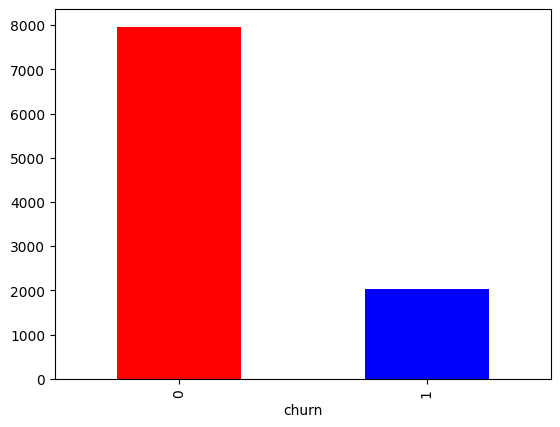

In [332]:
df['churn'].value_counts().plot(kind='bar',color=['red','blue'])

In [333]:
df_churn0 = df[df['churn'] == 0]
df_churn1 = df[df['churn'] == 1]

In [334]:
df_churn1_new = df_churn1.sample(churn0_count,replace=True)
balanced_df = pd.concat([df_churn0,df_churn1_new])
balanced_df.shape

(15926, 11)

<Axes: xlabel='churn'>

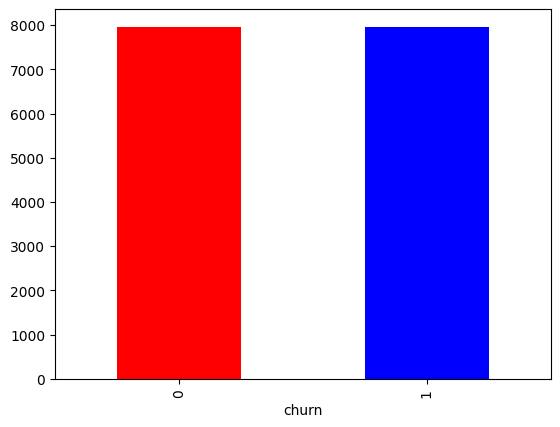

In [335]:
balanced_df['churn'].value_counts().plot(kind='bar',color=['red','blue'])

In [336]:
balanced_df['country'].value_counts()

country
France     7395
Germany    4860
Spain      3671
Name: count, dtype: int64

In [337]:
balanced_df['gender'].value_counts()

gender
Male      8061
Female    7865
Name: count, dtype: int64

In [338]:
Le = LabelEncoder()
balanced_df['gender'] = Le.fit_transform(balanced_df.gender.values)
balanced_df['country'] = Le.fit_transform(balanced_df.country.values)

In [339]:
balanced_df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
2553,727,2,1,71,8,0.00,1,1,1,198446.91,1
6054,633,0,0,47,0,0.00,1,1,1,6342.84,1
8434,512,1,1,41,7,122403.24,1,0,1,37439.90,1
4332,507,1,1,31,2,134237.07,1,1,1,166423.66,1


In [340]:
corr = balanced_df.corr()
corr.style.background_gradient(cmap='cool')

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.011796,-0.007959,-0.017428,0.007417,0.008070,0.006701,-0.007973,0.016615,-0.021975,-0.040099
country,0.011796,1.000000,0.011288,0.019116,-0.002532,0.078348,0.015251,-0.016378,-0.000781,0.002371,0.043634
gender,-0.007959,0.011288,1.000000,-0.038647,0.008146,0.016329,-0.033921,0.011811,0.026958,-0.012450,-0.132749
age,-0.017428,0.019116,-0.038647,1.000000,-0.010824,0.044130,-0.028285,-0.013895,0.006026,-0.003129,0.346949
tenure,0.007417,-0.002532,0.008146,-0.010824,1.000000,0.003667,0.027915,0.014414,-0.021415,0.024516,-0.027627
balance,0.008070,0.078348,0.016329,0.044130,0.003667,1.000000,-0.197017,-0.003646,-0.023580,0.000605,0.137795
products_number,0.006701,0.015251,-0.033921,-0.028285,0.027915,-0.197017,1.000000,-0.005596,0.044992,0.021069,-0.057605
credit_card,-0.007973,-0.016378,0.011811,-0.013895,0.014414,-0.003646,-0.005596,1.000000,-0.027757,-0.024663,-0.003857
active_member,0.016615,-0.000781,0.026958,0.006026,-0.021415,-0.023580,0.044992,-0.027757,1.000000,-0.005229,-0.199598
estimated_salary,-0.021975,0.002371,-0.012450,-0.003129,0.024516,0.000605,0.021069,-0.024663,-0.005229,1.000000,0.015576


In [341]:
X = balanced_df.iloc[:,:10]
Y = balanced_df.iloc[:,-1]

In [342]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
1,608,2,0,41,1,83807.86,1,0,1,112542.58
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
6,822,0,1,50,7,0.00,2,1,1,10062.80
8,501,0,1,44,4,142051.07,2,0,1,74940.50


In [343]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [344]:
X_scaled

array([[-0.40876632,  1.54209482, -1.01238359, ..., -1.54734875,
         1.09407161,  0.20732139],
       [ 0.52267575, -0.95758987, -1.01238359, ..., -1.54734875,
        -0.91401695, -0.1184883 ],
       [ 2.06825547,  1.54209482, -1.01238359, ...,  0.64626672,
         1.09407161, -0.37512818],
       ...,
       [-1.39138654,  0.29225247,  0.98776789, ..., -1.54734875,
         1.09407161, -1.10007582],
       [-1.44256467,  0.29225247,  0.98776789, ...,  0.64626672,
         1.09407161,  1.14529023],
       [-1.44256467,  0.29225247,  0.98776789, ...,  0.64626672,
         1.09407161,  1.14529023]])

In [345]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=1,stratify=Y)

In [346]:
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=10))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                704       
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [347]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [348]:
earlystopping = EarlyStopping(monitor='val_accuracy',patience=3)

In [349]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=19,callbacks=[earlystopping])

Epoch 1/50
399/399 [==============================] - 2s 3ms/step - loss: 0.5708 - accuracy: 0.7010 - val_loss: 0.4924 - val_accuracy: 0.7596
Epoch 2/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4766 - accuracy: 0.7710 - val_loss: 0.4560 - val_accuracy: 0.7743
Epoch 3/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4513 - accuracy: 0.7839 - val_loss: 0.4402 - val_accuracy: 0.7856
Epoch 4/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4372 - accuracy: 0.7911 - val_loss: 0.4389 - val_accuracy: 0.7866
Epoch 5/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4268 - accuracy: 0.7970 - val_loss: 0.4289 - val_accuracy: 0.7941
Epoch 6/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4188 - accuracy: 0.8018 - val_loss: 0.4224 - val_accuracy: 0.7928
Epoch 7/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4096 - accuracy: 0.8098 - val_loss: 0.4248 - val_accuracy: 0.7935
Epoch 

TypeError: 'History' object is not subscriptable

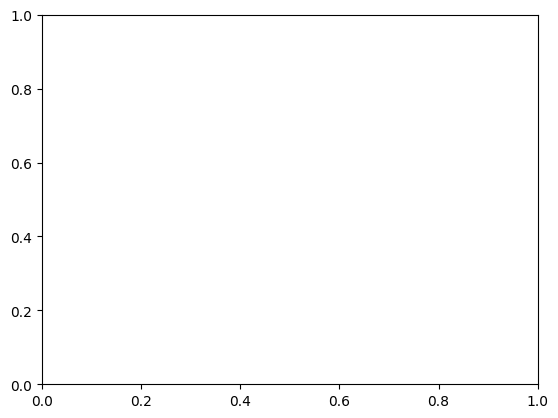

In [350]:
plt.subplot()
plt.subplot(model.history['accuracy'])